#과적합 피하기 - 초음파 광물 데이터

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)


- 데이터 전처리

In [66]:
df = pd.read_csv("sonar.csv", header = None)
df.shape

(208, 61)

In [67]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [68]:
# X data : scaling
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df.iloc[:, :-1])

In [69]:
# Y data : label encoding
from sklearn.preprocessing import LabelEncoder
y_labeled = LabelEncoder().fit_transform(df[60].values)

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_labeled, stratify=y_labeled, test_size = 0.2, random_state = seed
)

### 모델 정의/설정/학습/평가

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

- Case 1) 은닉층 2개

In [72]:
model1 = Sequential([
        Dense(80, input_shape = (60,), activation = "relu"),
        Dense(12, activation = "relu"),
        Dense(1, activation = "sigmoid")
])
model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 80)                4880      
                                                                 
 dense_56 (Dense)            (None, 12)                972       
                                                                 
 dense_57 (Dense)            (None, 1)                 13        
                                                                 
Total params: 5,865
Trainable params: 5,865
Non-trainable params: 0
_________________________________________________________________


In [73]:
model1.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])
hist1 = model1.fit(X_train, y_train, validation_split = 0.2,
                   epochs = 100, batch_size = 200, verbose = 0)

In [74]:
model1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.3239 - accuracy: 0.8571


[0.3238631784915924, 0.8571428656578064]

In [75]:
prams1, acc1 = 5865, 0.738095223903656

- Case 2) 은닉층 4개

In [76]:
model2 = Sequential([
        Dense(80, input_shape = (60,), activation = "relu"),
        Dense(48, activation = "relu"),
        Dense(20, activation = "relu"),
        Dense(8, activation = "relu"),
        Dense(1, activation = "sigmoid")
])
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 80)                4880      
                                                                 
 dense_59 (Dense)            (None, 48)                3888      
                                                                 
 dense_60 (Dense)            (None, 20)                980       
                                                                 
 dense_61 (Dense)            (None, 8)                 168       
                                                                 
 dense_62 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,925
Trainable params: 9,925
Non-trainable params: 0
_________________________________________________________________


In [77]:
model2.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])
hist2 = model2.fit(X_train, y_train, validation_split = 0.2,
                   epochs = 100, batch_size = 200, verbose = 0)
model2.evaluate(X_test, y_test)

2/2 [==============================] - 0s 11ms/step - loss: 0.5718 - accuracy: 0.8095


[0.571770966053009, 0.8095238208770752]

In [78]:
params2, acc2 = 9925,  0.761904776096344

- Case 3) 은닉층 6개

In [79]:
model3 = Sequential([
        Dense(80, input_shape = (60,), activation = "relu"),
        Dense(60, activation = "relu"),
        Dense(48, activation = "relu"),
        Dense(32, activation = "relu"),
        Dense(20, activation = "relu"),
        Dense(8, activation = "relu"),
        Dense(1, activation = "sigmoid")
])
model3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 80)                4880      
                                                                 
 dense_64 (Dense)            (None, 60)                4860      
                                                                 
 dense_65 (Dense)            (None, 48)                2928      
                                                                 
 dense_66 (Dense)            (None, 32)                1568      
                                                                 
 dense_67 (Dense)            (None, 20)                660       
                                                                 
 dense_68 (Dense)            (None, 8)                 168       
                                                                 
 dense_69 (Dense)            (None, 1)               

In [80]:
model3.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])
hist3 = model3.fit(X_train, y_train, validation_split = 0.2,
                   epochs = 100, batch_size = 200, verbose = 0)
model3.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.7373 - accuracy: 0.7857


[0.7373403906822205, 0.7857142686843872]

In [81]:
params3, acc3 = 15073,  0.8095238208770752

- Case 4) 은닉층 8개

In [82]:
model4 = Sequential([
        Dense(80, input_shape = (60,), activation = "relu"),
        Dense(70, activation = "relu"),
        Dense(60, activation = "relu"),
        Dense(50, activation = "relu"),
        Dense(40, activation = "relu"),
        Dense(30, activation = "relu"),
        Dense(20, activation = "relu"),
        Dense(10, activation = "relu"),
        Dense(1, activation = "sigmoid")
])
model4.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 80)                4880      
                                                                 
 dense_71 (Dense)            (None, 70)                5670      
                                                                 
 dense_72 (Dense)            (None, 60)                4260      
                                                                 
 dense_73 (Dense)            (None, 50)                3050      
                                                                 
 dense_74 (Dense)            (None, 40)                2040      
                                                                 
 dense_75 (Dense)            (None, 30)                1230      
                                                                 
 dense_76 (Dense)            (None, 20)              

In [83]:
model4.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])
hist4 = model4.fit(X_train, y_train, validation_split = 0.2,
                   epochs = 100, batch_size = 200, verbose = 0)
model4.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 1.6529 - accuracy: 0.7619


[1.652888536453247, 0.761904776096344]

In [84]:
params4, acc4 = 21971,  0.761904776096344

- 학습과정 시각화

In [85]:
y_acc1 = hist1.history["accuracy"]
y_acc2 = hist2.history["accuracy"]
y_acc3 = hist3.history["accuracy"]
y_acc4 = hist4.history["accuracy"]
y_vloss1 = hist1.history["val_loss"]
y_vloss2 = hist2.history["val_loss"]
y_vloss3 = hist3.history["val_loss"]
y_vloss4 = hist4.history["val_loss"]
xs = np.arange(1, len(y_acc1) + 1)

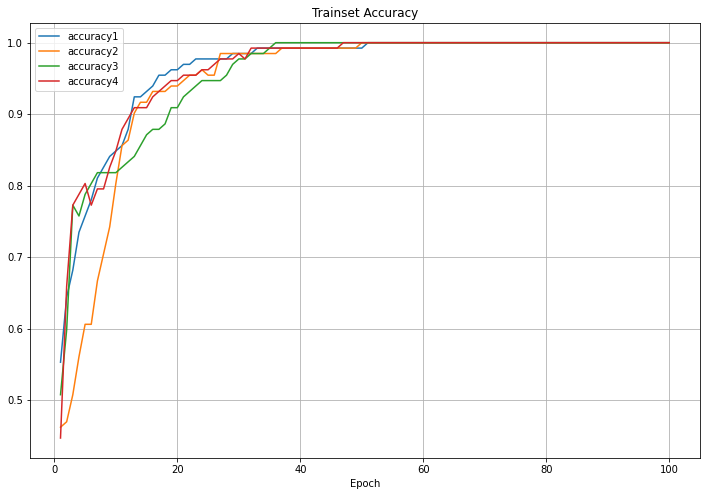

In [86]:
plt.figure(figsize = (12,8))
plt.plot(xs, y_acc1, label = "accuracy1")
plt.plot(xs, y_acc2, label = "accuracy2")
plt.plot(xs, y_acc3, label = "accuracy3")
plt.plot(xs, y_acc4, label = "accuracy4")
plt.legend(), plt.grid()
plt.xlabel("Epoch"), plt.title("Trainset Accuracy")
plt.show()

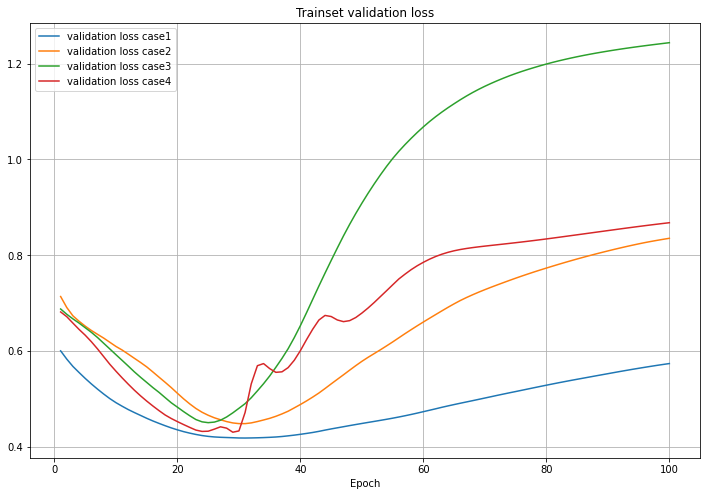

In [87]:
plt.figure(figsize = (12,8))
plt.plot(xs, y_vloss1, label = "validation loss case1")
plt.plot(xs, y_vloss2, label = "validation loss case2")
plt.plot(xs, y_vloss3, label = "validation loss case3")
plt.plot(xs, y_vloss4, label = "validation loss case4")
plt.legend(), plt.grid()
plt.xlabel("Epoch"), plt.title("Trainset validation loss")
plt.show()

- Case2 에 대해 베스트 모델

In [109]:
model2 = Sequential([
        Dense(80, input_shape = (60,), activation = "relu"),
        Dense(48, activation = "relu"),
        Dense(20, activation = "relu"),
        Dense(8, activation = "relu"),
        Dense(1, activation = "sigmoid")
])
model2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 80)                4880      
                                                                 
 dense_85 (Dense)            (None, 48)                3888      
                                                                 
 dense_86 (Dense)            (None, 20)                980       
                                                                 
 dense_87 (Dense)            (None, 8)                 168       
                                                                 
 dense_88 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,925
Trainable params: 9,925
Non-trainable params: 0
_________________________________________________________________


In [110]:
model2.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

- 베스트 모델만 저장하는 콜백 함수

In [111]:
from tensorflow.keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint("sonar_best.h5", monitor = "val_loss", save_best_only = True) # 저장할 모델 이름과, 그 기준을 전달해야함

In [ ]:
# epoch 가 종료될때마다 callback 함수를 실행하도록 설정
hist = model2.fit(X_train, y_train, validation_split = 0.2,
                 epochs = 200, batch_size = 100,
                 callbacks = [mc])

In [113]:
from tensorflow.keras.models import load_model
best_model = load_model("sonar_best.h5")
best_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.4611 - accuracy: 0.8571


[0.4611447751522064, 0.8571428656578064]

In [114]:
y_acc = hist.history["accuracy"]
y_vloss = hist.history["val_loss"]
xs = np.arange(1, len(y_acc) + 1)

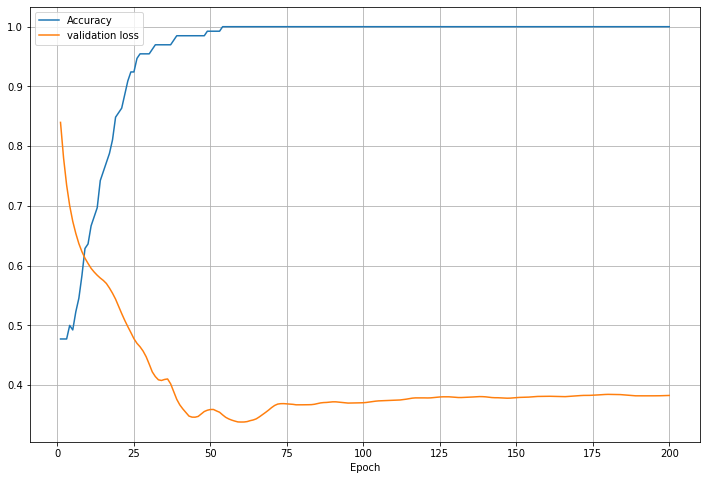

In [115]:
plt.figure(figsize = (12,8))
plt.plot(xs, y_acc, label = "Accuracy")
plt.plot(xs, y_vloss, label = "validation loss")
plt.legend(), plt.grid()
plt.xlabel("Epoch"), plt.title("")
plt.show()

- 조기 종료 콜백 함수


In [117]:
del model2

In [118]:
model = Sequential([
        Dense(80, input_shape = (60,), activation = "relu"),
        Dense(48, activation = "relu"),
        Dense(20, activation = "relu"),
        Dense(8, activation = "relu"),
        Dense(1, activation = "sigmoid")
])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_89 (Dense)            (None, 80)                4880      
                                                                 
 dense_90 (Dense)            (None, 48)                3888      
                                                                 
 dense_91 (Dense)            (None, 20)                980       
                                                                 
 dense_92 (Dense)            (None, 8)                 168       
                                                                 
 dense_93 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,925
Trainable params: 9,925
Non-trainable params: 0
_________________________________________________________________


In [125]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [126]:
from tensorflow.keras.callbacks import EarlyStopping
mc = ModelCheckpoint("sonar_best.h5", monitor = "val_loss",
                     save_best_only = True, verbose = 1) 
es = EarlyStopping(patience = 20) # 20 번의 epoch동안 더 좋아지지 않는다면 끝낸다

In [ ]:
hist = model.fit(X_train, y_train, validation_split = 0.2,
                 epochs = 200, batch_size = 100,
                 callbacks = [mc, es], verbose = 1)

In [128]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.6620 - accuracy: 0.7619


[0.6620143055915833, 0.761904776096344]